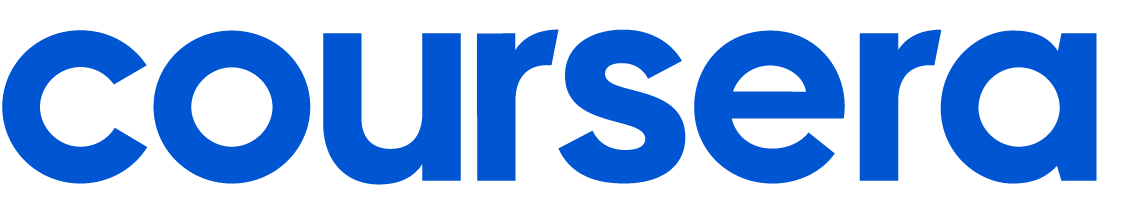

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant machine learning problems with a unique dataset that will put your modeling skills to the test. Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the loan default prediction problem on a very unique and interesting group of individuals who have taken financial loans. 

Imagine that you are a new data scientist at a major financial institution and you are tasked with building a model that can predict which individuals will default on their loan payments. We have provided a dataset that is a sample of individuals who received loans in 2021. 

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past borrowers of a financial institution that contain information about the individual and the specific loan. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (255,347 borrowers to be exact) and importantly, will reveal whether or not the borrower has defaulted on their loan payments (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (109,435 borrowers to be exact), but does not disclose the “ground truth” for each borrower. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the borrowers in `test.csv` will default on their loan payments, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique Loan. For each Loan, a single observation (`LoanID`) is included during which the loan was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Default` which indicates if a borrower has defaulted on payments.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

Column_name Column_type Data_type  \
0           LoanID  Identifier    string   
1              Age     Feature   integer   
2           Income     Feature   integer   
3       LoanAmount     Feature   integer   
4      CreditScore     Feature   integer   
5   MonthsEmployed     Feature   integer   
6   NumCreditLines     Feature   integer   
7     InterestRate     Feature     float   
8         LoanTerm     Feature   integer   
9         DTIRatio     Feature     float   
10       Education     Feature    string   
11  EmploymentType     Feature    string   
12   MaritalStatus     Feature    string   
13     HasMortgage     Feature    string   
14   HasDependents     Feature    string   
15     LoanPurpose     Feature    string   
16     HasCoSigner     Feature    string   
17         Default      Target   integer   

                                                                                          Description  
0                                                                  A unique identifier for each loan.  
1                                                                            The age of the borrower.  
2                                                                  The annual income of the borrower.  
3                                                                 The amount of money being borrowed.  
4                                The credit score of the borrower, indicating their creditworthiness.  
5                                                The number of months the borrower has been employed.  
6                                                   The number of credit lines the borrower has open.  
7                                                                     The interest rate for the loan.  
8                                                              The term length of the loan in months.  
9                  The Debt-to-Income ratio, indicating the borrower's debt compared to their income.  
10  The highest level of education attained by the borrower (PhD, Master's, Bachelor's, High School).  
11   The type of employment status of the borrower (Full-time, Part-time, Self-employed, Unemployed).  
12                                    The marital status of the borrower (Single, Married, Divorced).  
13                                                   Whether the borrower has a mortgage (Yes or No).  
14                                                   Whether the borrower has dependents (Yes or No).  
15                                  The purpose of the loan (Home, Auto, Education, Business, Other).  
16                                                      Whether the loan has a co-signer (Yes or No).  
17                   The binary target variable indicating whether the loan defaulted (1) or not (0).

## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 109,435 rows (plus a header row). The first column should be `LoanID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likelihood that the borrower will default__.

Your submission will show an error if you have extra columns (beyond `LoanID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which loans will default, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pip install --upgrade pip

   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 1.3 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.1 MB 2.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.6/2.1 MB 4.4 MB/s eta 0:00:01
   ------------------ --------------------- 1.0/2.1 MB 5.7 MB/s eta 0:00:01
   --------------------------- ------------ 1.4/2.1 MB 6.5 MB/s eta 0:00:01
   -------------------------------- ------- 1.7/2.1 MB 6.9 MB/s eta 0:00:01
   ------------------------------------- -- 2.0/2.1 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 5.8 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.3.2
    Uninstalling pip-23.3.2:
      Successfully uninstalled pip-23.3.2
Note: you may need to restart the kernel to use updated packages.


In [13]:
from scipy.stats import skew

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [4]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (255347, 18)


LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56   85994       50587          520              80   
1  HPSK72WA7R   69   50432      124440          458              15   
2  C1OZ6DPJ8Y   46   84208      129188          451              26   
3  V2KKSFM3UN   32   31713       44799          743               0   
4  EY08JDHTZP   60   20437        9139          633               8   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               4         15.23        36      0.44   Bachelor's   
1               1          4.81        60      0.68     Master's   
2               3         21.17        24      0.31     Master's   
3               3          7.07        24      0.23  High School   
4               4          6.51        48      0.73   Bachelor's   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes           Yes       Other   
1      Full-time       Married          No            No       Other   
2     Unemployed      Divorced         Yes           Yes        Auto   
3      Full-time       Married          No            No    Business   
4     Unemployed      Divorced          No           Yes        Auto   

  HasCoSigner  Default  
0         Yes        0  
1         Yes        0  
2          No        1  
3          No        0  
4          No        0

In [5]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (109435, 17)


LoanID  Age  Income  LoanAmount  CreditScore  MonthsEmployed  \
0  7RYZGMKJIR   32  131645       43797          802              23   
1  JDL5RH07AM   61  134312       18402          369              87   
2  STAL716Y79   55  115809      151774          563               3   
3  SO0KKJ3IQB   58   94970       55789          337              24   
4  T99CWTYDCP   63   71727      189798          451              52   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio    Education  \
0               2          6.10        24      0.13  High School   
1               2         12.99        60      0.59  High School   
2               3          5.51        48      0.82   Bachelor's   
3               1         23.93        36      0.77   Bachelor's   
4               3         22.05        48      0.44          PhD   

  EmploymentType MaritalStatus HasMortgage HasDependents LoanPurpose  \
0      Full-time      Divorced         Yes            No       Other   
1  Self-employed        Single          No            No    Business   
2      Full-time        Single         Yes           Yes       Other   
3     Unemployed      Divorced          No            No    Business   
4     Unemployed        Single         Yes            No        Auto   

  HasCoSigner  
0          No  
1         Yes  
2         Yes  
3          No  
4          No

## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [6]:
# your code here (optional)
train_df.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [7]:
# Check for NAN values
nan_val = train_df.isna().sum()
nan_val

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [8]:
# Check for dublicates
duplicates = train_df[train_df.duplicated()].sum()
duplicates

LoanID              0
Age                 0
Income              0
LoanAmount          0
CreditScore         0
MonthsEmployed      0
NumCreditLines      0
InterestRate      0.0
LoanTerm            0
DTIRatio          0.0
Education           0
EmploymentType      0
MaritalStatus       0
HasMortgage         0
HasDependents       0
LoanPurpose         0
HasCoSigner         0
Default             0
dtype: object

In [14]:
vizualize_cols = ["Income",
    "LoanAmount",
    "CreditScore",
    "MonthsEmployed",
    "NumCreditLines",
    "InterestRate",
    "DTIRatio",]

for i, col in enumerate(vizualize_cols, 1):
    skewness = skew(train_df[col])
    print(f"Skewness of {col}: {skewness}")

Skewness of Income: -0.00038051104936479783
Skewness of LoanAmount: -0.0018272361131660081
Skewness of CreditScore: 0.004688158798358318
Skewness of MonthsEmployed: -0.002141671036159281
Skewness of NumCreditLines: -0.0002780231256420512
Skewness of InterestRate: 0.004607863854856442
Skewness of DTIRatio: -0.0014989545647889244


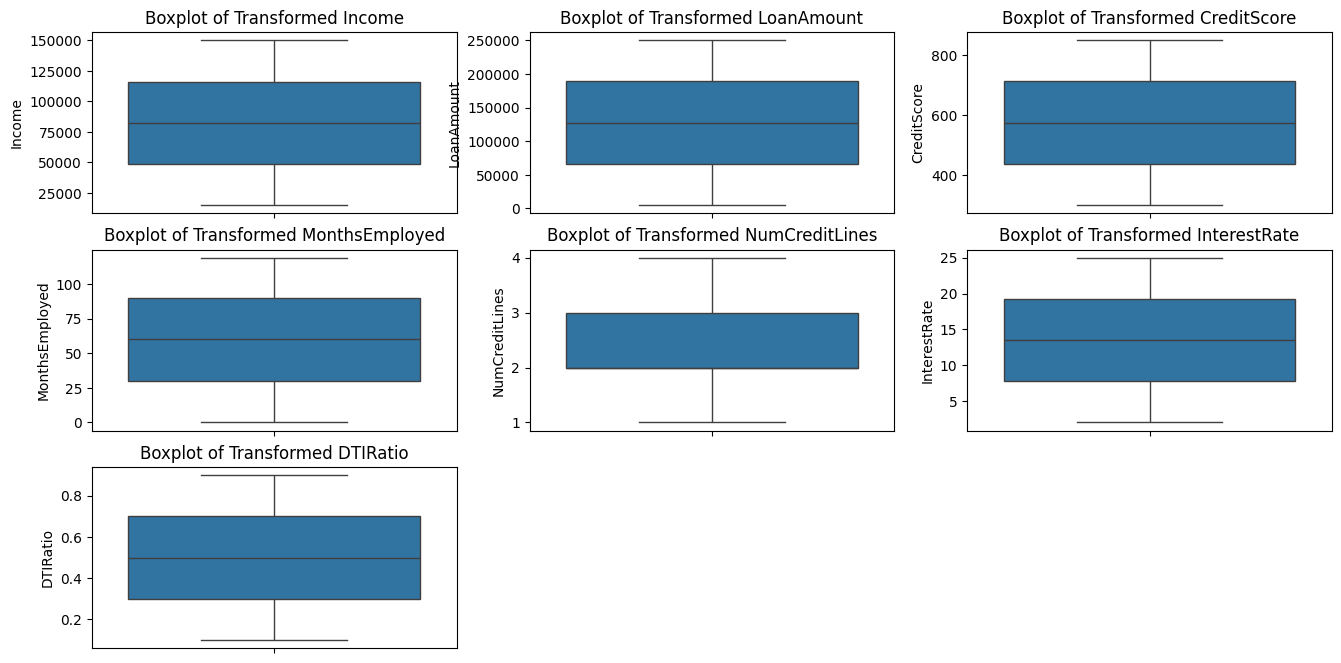

In [15]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(vizualize_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=col, data=train_df)
    plt.title(f"Boxplot of Transformed {col}")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

In [16]:
log_columns = ["Income", "LoanAmount"] # Big range of data

train_df_log = train_df.copy()

for col in log_columns:
    train_df_log[col] = np.log1p(train_df_log[col])


test_df_log = test_df.copy()
for col in log_columns:
    test_df_log[col] = np.log1p(test_df_log[col])


### Labeling non numeric data

In [17]:
from sklearn.preprocessing import LabelEncoder

# Columns to encode
string_column=['Education',
            'EmploymentType',
            'MaritalStatus',
            'HasMortgage',
            'HasDependents',
            'LoanPurpose',
            'HasCoSigner'
           ]
# Apply label encoding
label_encoder = LabelEncoder()
train_df_encoded = train_df_log.copy()
for col in string_column:
    train_df_encoded[col] = label_encoder.fit_transform(train_df_encoded[col])

test_df_encoded = test_df_log.copy()
for col in string_column:
    test_df_encoded[col] = label_encoder.fit_transform(test_df_encoded[col])



In [18]:
train_df_encoded.head(2)

LoanID  Age     Income  LoanAmount  CreditScore  MonthsEmployed  \
0  I38PQUQS96   56  11.362044   10.831470          520              80   
1  HPSK72WA7R   69  10.828401   11.731587          458              15   

   NumCreditLines  InterestRate  LoanTerm  DTIRatio  Education  \
0               4         15.23        36      0.44          0   
1               1          4.81        60      0.68          2   

   EmploymentType  MaritalStatus  HasMortgage  HasDependents  LoanPurpose  \
0               0              0            1              1            4   
1               0              1            0              0            4   

   HasCoSigner  Default  
0            1        0  
1            1        0

In [19]:
test_df_encoded.dtypes

LoanID             object
Age                 int64
Income            float64
LoanAmount        float64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int32
EmploymentType      int32
MaritalStatus       int32
HasMortgage         int32
HasDependents       int32
LoanPurpose         int32
HasCoSigner         int32
dtype: object

In [20]:
# drop LoadID column and Default
train_df_set = train_df_encoded.drop(['LoanID', 'Default'], axis=1)
test_df_encoded = test_df_encoded.drop(['LoanID'], axis=1)

train_labels = train_df_encoded['Default']

In [21]:
'''
bins = [-1, 12, 48, 96, float('inf')]  # Bin edges, representing the upper limit of each range
labels = ['0-1 year', '2-4 years', '5-8 years', '8+ years']  # Labels for each bin range

# Create a new column 'EmploymentCategory' with the categorization
df['EmploymentCategory'] = pd.cut(df['MonthsEmployed'], bins=bins, labels=labels, right=False)
'''

"\nbins = [-1, 12, 48, 96, float('inf')]  # Bin edges, representing the upper limit of each range\nlabels = ['0-1 year', '2-4 years', '5-8 years', '8+ years']  # Labels for each bin range\n\n# Create a new column 'EmploymentCategory' with the categorization\ndf['EmploymentCategory'] = pd.cut(df['MonthsEmployed'], bins=bins, labels=labels, right=False)\n"

### Feature Importance

In [22]:
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(random_state=42)
model.fit(train_df_set, train_labels)

# Get feature importances
feature_importances = model.feature_importances_

# Create a DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': train_df_set.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance DataFrame
print("Feature Importance:")
print(feature_importance_df)

Feature Importance:
           Feature  Importance
1           Income    0.131455
6     InterestRate    0.125897
2       LoanAmount    0.120491
3      CreditScore    0.103909
0              Age    0.099757
4   MonthsEmployed    0.098170
8         DTIRatio    0.090078
7         LoanTerm    0.038423
14     LoanPurpose    0.037919
5   NumCreditLines    0.031319
9        Education    0.030887
10  EmploymentType    0.029546
11   MaritalStatus    0.024742
12     HasMortgage    0.014732
13   HasDependents    0.012604
15     HasCoSigner    0.010071


In [23]:
top_fetures = feature_importance_df["Feature"].head(10).tolist()

In [24]:
top_fetures

['Income',
 'InterestRate',
 'LoanAmount',
 'CreditScore',
 'Age',
 'MonthsEmployed',
 'DTIRatio',
 'LoanTerm',
 'LoanPurpose',
 'NumCreditLines']

### Dealing with imbalanced data by calculating weights

In [25]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [26]:
# Check the class distribution
class_distribution = train_labels.value_counts()
print("Class distribution:\n", class_distribution)

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(train_labels), y=train_labels)


Class distribution:
 Default
0    225694
1     29653
Name: count, dtype: int64


In [27]:
train_final = train_df_set[top_fetures] # normalized, labeld and selected top features dataset 

In [28]:
test_final = test_df_encoded[top_fetures]

In [29]:
train_final

Income  InterestRate  LoanAmount  CreditScore  Age  MonthsEmployed  \
0       11.362044         15.23   10.831470          520   56              80   
1       10.828401          4.81   11.731587          458   69              15   
2       11.341057         21.17   11.769032          451   46              26   
3       10.364514          7.07   10.709963          743   32               0   
4        9.925151          6.51    9.120416          633   60               8   
...           ...           ...         ...          ...  ...             ...   
255342  10.544815         14.11   12.258110          541   19             109   
255343  10.858114         11.55   12.154253          511   32              14   
255344  11.348298          5.29   12.246711          597   56              70   
255345  11.351700         20.90   11.011654          809   42              40   
255346  10.017664          6.73    9.824553          636   62             113   

        DTIRatio  LoanTerm  LoanPurpose  NumCreditLines  
0           0.44        36            4               4  
1           0.68        60            4               1  
2           0.31        24            0               3  
3           0.23        24            1               3  
4           0.73        48            0               4  
...          ...       ...          ...             ...  
255342      0.85        12            4               4  
255343      0.21        24            3               2  
255344      0.50        60            0               3  
255345      0.44        48            4               1  
255346      0.48        12            2               2  

[255347 rows x 10 columns]

In [30]:
# Split the resampled training data into training and validation sets
X_train, X_val, y_, y_val = train_test_split(
    train_final, train_labels, test_size=0.2, random_state=42
)

# Display the shapes of the resulting sets
print("Training Set Shape:", X_train.shape)
print("Train set labels Shape:", y_val.shape)
print("Validation Set Shape:", X_val.shape)

Training Set Shape: (204277, 10)
Train set labels Shape: (51070,)
Validation Set Shape: (51070, 10)


## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 109,435 entries plus a header row attempting to predict the likelihood of borrowers to default on their loans in `test_df`. Your submission will throw an error if you have extra columns (beyond `LoanID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`LoanID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `LoanID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts loan defaults using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

### Calculate hyperparameters for the model using Grid Search

In [35]:
'''

# Define the parameter grid for Random Forest
rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
}

# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
}

# Create GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_pipeline, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(X_train, y_)

# Create GridSearchCV for Gradient Boosting
gb_grid_search = GridSearchCV(gb_pipeline, param_grid=gb_param_grid, cv=5, scoring='accuracy')
gb_grid_search.fit(X_train, y_)

# Print best parameters for Random Forest
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Print best parameters for Gradient Boosting
print("Best parameters for Gradient Boosting:", gb_grid_search.best_params_)
'''

Best parameters for Random Forest: {'classifier__max_depth': None, 'classifier__n_estimators': 100}
Best parameters for Gradient Boosting: {'classifier__learning_rate': 0.2, 'classifier__n_estimators': 50}


In [41]:
# BEST RESULTS for HYPERPARAM. based on GridSearch
# Best hyperparameters for Random Forest
best_rf_params = {
    'n_estimators': 100,
    'max_depth': None,

}

# Best hyperparameters for Gradient Boosting
best_gb_params = {
    'n_estimators': 100,
    'learning_rate': 0.1,

}


In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Create Random Forest model with class weights
rf_model = RandomForestClassifier(class_weight=dict(zip(np.unique(train_labels), class_weights), **best_rf_params))

# Create Gradient Boosting model with class weights
gb_model = GradientBoostingClassifier(**best_gb_params)

# Create pipeline for Random Forest
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', rf_model)
])

# Create pipeline for Gradient Boosting
gb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', gb_model)
])

# Use the best models obtained from GridSearchCV
best_rf_model = rf_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_

# Fit and evaluate Random Forest pipeline with best hyperparameters
best_rf_model.fit(X_train, y_)
rf_predictions = best_rf_model.predict(X_val)
print("Random Forest Classification Report:\n", classification_report(y_val, rf_predictions))

# Fit and evaluate Gradient Boosting pipeline with best hyperparameters
best_gb_model.fit(X_train, y_)
gb_predictions = best_gb_model.predict(X_val)
print("Gradient Boosting Classification Report:\n", classification_report(y_val, gb_predictions))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.60      0.03      0.06      5900

    accuracy                           0.89     51070
   macro avg       0.74      0.51      0.50     51070
weighted avg       0.85      0.89      0.84     51070

Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.62      0.05      0.10      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.52     51070
weighted avg       0.86      0.89      0.84     51070



Gradient Boosting seems to give better results

In [44]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probabilities = best_gb_model.predict_proba(test_final)[:, 1]

In [46]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'LoanID': test_df[['LoanID']].values[:, 0],
                             'predicted_probability': predicted_probabilities})

In [47]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

(109435, 2)


LoanID  predicted_probability
0  7RYZGMKJIR               0.063475
1  JDL5RH07AM               0.031944
2  STAL716Y79               0.054379
3  SO0KKJ3IQB               0.111513
4  T99CWTYDCP               0.097698
5  0SNHFWV4UP               0.100355
6  S6ITP6LGYS               0.036850
7  A6I7U12IRJ               0.067011
8  8W6KY50JU4               0.145931
9  THFQ08OLMU               0.084717

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [48]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [49]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'LoanID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [50]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 109435, 'The dataframe prediction_df should have 109435 rows.'

In [51]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [52]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!